In [8]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [2]:
samples={'human/minION': "20230313_HD19005,20230313_HD19006,20230313_HD19007,20230313_HD19015,20230313_HD19030,20230313_HD19031,20230313_HD19056,20230313_HD19059,20230313_HD19061,20230313_HD7036".split(','),
         'human/pacBio': "20230504_HD19005,20230504_HD19006,20230504_HD19007,20230504_HD19015,20230504_HD19030,20230504_HD19031,20230504_HD19056,20230504_HD19059,20230504_HD19061,20230504_HD7036".split(','),
         'mouse_spleen/minION': "20240817_S.A1,20240817_S.A2,20240817_S.A3,20240817_S.A4,20240817_S.B1,20240817_S.B2,20240817_S.B3,20240817_S.B4,20240817_S.C1,20240817_S.C2,20240817_S.C3,20240817_S.C4".split(","),
         'mouse_LN/minION': "20240817_L.A1,20240817_L.A2,20240817_L.A3,20240817_L.A4,20240817_L.B1,20240817_L.B2,20240817_L.B3,20240817_L.B4,20240817_L.C1,20240817_L.C2,20240817_L.C3,20240817_L.C4".split(','),
         'mouse_CH12/minION': "20220425_WT_2,20220425_WT_3,20221118_WT_7_switch,20221118_WT_8_switch,20221212_BC32_switch,20230120_BC04_switch,20230120_BC76_switch,20230120_BC91_switch,20230213_WT_1,20230213_WT_2,20230213_WT_3,20240830_CH12.03,20240830_CH12.07,20240830_CH12.12,20240830_CH12.21,20240830_CH12.27,20240830_CH12.28,20240830_CH12.34".split(','),
         'mouse/pacBio': "PRJNA831666_WT_1,PRJNA831666_WT_2,PRJNA831666_WT_3".split(','),
         'mouse_spleen/HTGTS': "SRR2104731,SRR2104732,SRR2104733,SRR2104734,SRR2104735".split(','),
         'mouse_CH12/HTGTS': "SRR6293456,SRR6293457,SRR6293458,SRR6293459,SRR6293460,SRR6293461".split(',')}

In [3]:
last_pars={'human/minION': [np.load(f'pipeline/{sample}/{sample}_last_pars.npz') for sample in samples['human/minION']],
           'human/pacBio': [np.load(f'pipeline/{sample}/{sample}_last_pars.npz') for sample in samples['human/pacBio']],
           'mouse_spleen/minION': [np.load(f'../mouse/pipeline/{sample}/{sample}_last_pars.npz') for sample in samples['mouse_spleen/minION']],
           'mouse_LN/minION': [np.load(f'../mouse/pipeline/{sample}/{sample}_last_pars.npz') for sample in samples['mouse_LN/minION']],
           'mouse_CH12/minION': [np.load(f'../mouse/pipeline/{sample}/{sample}_last_pars.npz') for sample in samples['mouse_CH12/minION']],
           'mouse/pacBio': [np.load(f'../external/vincendeau/pipeline/{sample}/{sample}_last_pars.npz') for sample in samples['mouse/pacBio']],
           'mouse_spleen/HTGTS': [np.load(f'../external/HTGTS/pipeline/{sample}/{sample}_bam_pars.npz') for sample in samples['mouse_spleen/HTGTS']],
           'mouse_CH12/HTGTS': [np.load(f'../external/HTGTS/pipeline/{sample}/{sample}_bam_pars.npz') for sample in samples['mouse_CH12/HTGTS']]}

In [4]:
accuracy=dict((k,[np.mean(1-np.diag(pars["p_c"] / pars["p_c"].sum(1)[:, np.newaxis])) for pars in v]) for k,v in last_pars.items())

In [5]:
%matplotlib inline

In [6]:
from swibrid.utils import parse_switch_coords, read_switch_anno, get_switch_coverage, shift_coord

In [7]:
switch_chrom = {}
switch_start = {}
switch_end = {}
switch_orientation = {}
switch_anno = {}
cov_int = {}
Ltot = {}
eff_start = {}
eff_end = {}
anno_recs = {}

switch_chrom['human/minION'], switch_start['human/minION'],  switch_end['human/minION'],  switch_orientation['human/minION'] = parse_switch_coords('chr14:105583000-105872000:-')
switch_anno['human/minION'] = read_switch_anno('hg38_switch_regions.bed')
cov_int['human/minION'], Ltot['human/minION'], eff_start['human/minION'], eff_end['human/minION'], anno_recs['human/minION'] = get_switch_coverage(switch_anno['human/minION'], switch_chrom['human/minION'], switch_start['human/minION'], switch_end['human/minION'])
switch_chrom['human/pacBio'], switch_start['human/pacBio'],  switch_end['human/pacBio'],  switch_orientation['human/pacBio'] = parse_switch_coords('chr14:105583000-105872000:-')
switch_anno['human/pacBio'] = read_switch_anno('hg38_switch_regions.bed')
cov_int['human/pacBio'], Ltot['human/pacBio'], eff_start['human/pacBio'], eff_end['human/pacBio'], anno_recs['human/pacBio'] = get_switch_coverage(switch_anno['human/pacBio'], switch_chrom['human/pacBio'], switch_start['human/pacBio'], switch_end['human/pacBio'])

switch_chrom['mouse/minION'], switch_start['mouse/minION'],  switch_end['mouse/minION'],  switch_orientation['mouse/minION'] = parse_switch_coords('chr12:113200000-113500000:-')
switch_anno['mouse/minION'] = read_switch_anno('../mouse/mm10_switch_regions.bed')
cov_int['mouse/minION'], Ltot['mouse/minION'], eff_start['mouse/minION'], eff_end['mouse/minION'], anno_recs['mouse/minION'] = get_switch_coverage(switch_anno['mouse/minION'], switch_chrom['mouse/minION'], switch_start['mouse/minION'], switch_end['mouse/minION'])
switch_chrom['mouse/pacBio'], switch_start['mouse/pacBio'],  switch_end['mouse/pacBio'],  switch_orientation['mouse/pacBio'] = parse_switch_coords('chr12:113200000-113500000:-')
switch_anno['mouse/pacBio'] = read_switch_anno('../external/vincendeau/mm10_switch_regions.bed')
cov_int['mouse/pacBio'], Ltot['mouse/pacBio'], eff_start['mouse/pacBio'], eff_end['mouse/pacBio'], anno_recs['mouse/pacBio'] = get_switch_coverage(switch_anno['mouse/pacBio'], switch_chrom['mouse/pacBio'], switch_start['mouse/pacBio'], switch_end['mouse/pacBio'])
switch_chrom['mouse/HTGTS'], switch_start['mouse/HTGTS'],  switch_end['mouse/HTGTS'],  switch_orientation['mouse/HTGTS'] = parse_switch_coords('chr12:113200000-113500000:-')
switch_anno['mouse/HTGTS'] = read_switch_anno('../external/HTGTS/mm10_switch_regions.bed')
cov_int['mouse/HTGTS'], Ltot['mouse/HTGTS'], eff_start['mouse/HTGTS'], eff_end['mouse/HTGTS'], anno_recs['mouse/HTGTS'] = get_switch_coverage(switch_anno['mouse/HTGTS'], switch_chrom['mouse/HTGTS'], switch_start['mouse/HTGTS'], switch_end['mouse/HTGTS'])


[I 250709 14:04:42 utils:53] using switch annotation from hg38_switch_regions.bed
[I 250709 14:04:42 utils:53] using switch annotation from hg38_switch_regions.bed
[I 250709 14:04:42 utils:53] using switch annotation from ../mouse/mm10_switch_regions.bed
[I 250709 14:04:42 utils:53] using switch annotation from ../external/vincendeau/mm10_switch_regions.bed
[I 250709 14:04:42 utils:53] using switch annotation from ../external/HTGTS/mm10_switch_regions.bed


In [8]:
gaps={'human/minION': [np.load(f'pipeline/{sample}/{sample}_gaps.npz') for sample in samples['human/minION']],
      'human/pacBio': [np.load(f'pipeline/{sample}/{sample}_gaps.npz') for sample in samples['human/pacBio']],
'mouse_spleen/minION': [np.load(f'../mouse/pipeline/{sample}/{sample}_gaps.npz') for sample in samples['mouse_spleen/minION']],
'mouse_LN/minION': [np.load(f'../mouse/pipeline/{sample}/{sample}_gaps.npz') for sample in samples['mouse_LN/minION']],
'mouse_CH12/minION': [np.load(f'../mouse/pipeline/{sample}/{sample}_gaps.npz') for sample in samples['mouse_CH12/minION']],
'mouse/pacBio': [np.load(f'../external/vincendeau/pipeline/{sample}/{sample}_gaps.npz') for sample in samples['mouse/pacBio']],
'mouse_CH12/HTGTS': [np.load(f'../external/HTGTS/pipeline/{sample}/{sample}_gaps.npz') for sample in samples['mouse_CH12/HTGTS']],
'mouse_spleen/HTGTS': [np.load(f'../external/HTGTS/pipeline/{sample}/{sample}_gaps.npz') for sample in samples['mouse_spleen/HTGTS']]}

In [9]:
import scipy.sparse
bp_hist={}
binsize=50
for k,vv in gaps.items():
    bp_hist[k] = []
    k2=k.split('/')[0].split('_')[0] + '/' + k.split('/')[1]
    for v in vv:
        gap_read = v["read_idx"]
        gap_left = v["gap_left"]
        gap_right = v["gap_right"]
        gap_size = v["gap_size"]

        Leff = Ltot[k2] // binsize
        take = (gap_size >= 75) & (gap_left // binsize < Leff) & (gap_right // binsize < Leff)
        bph = scipy.sparse.csr_matrix(
            (np.ones(np.sum(take))/np.sum(take),
            (
                np.minimum(gap_left[take], gap_right[take]) // binsize,
                np.maximum(gap_left[take], gap_right[take]) // binsize,
            ),
        ),
        shape=(Leff, Leff),
        ).todense()
        np.nan_to_num(bph, copy=False)
        bp_hist[k].append((bph + bph.T).mean(0).A1)


In [10]:
complexity={'human/minION': np.load(f'pipeline/all/motifs.npz'),
            'human/pacBio': np.load(f'pipeline/all/motifs.npz'),
            'mouse/minION': np.load(f'../mouse/pipeline/all/motifs.npz'),
            'mouse/pacBio': np.load(f'../external/vincendeau/pipeline/all/motifs.npz'),
            'mouse/HTGTS': np.load(f'../external/HTGTS/pipeline/all/motifs.npz')}

In [11]:
switch_anno

{'human/minION': [('chr14', 105588700, 105591700, 'SA2'),
  ('chr14', 105603000, 105603500, 'SE'),
  ('chr14', 105626500, 105629000, 'SG4'),
  ('chr14', 105645400, 105647900, 'SG2'),
  ('chr14', 105708900, 105712900, 'SA1'),
  ('chr14', 105743700, 105747700, 'SG1'),
  ('chr14', 105772100, 105775600, 'SG3'),
  ('chr14', 105856100, 105861100, 'SM')],
 'human/pacBio': [('chr14', 105588700, 105591700, 'SA2'),
  ('chr14', 105603000, 105603500, 'SE'),
  ('chr14', 105626500, 105629000, 'SG4'),
  ('chr14', 105645400, 105647900, 'SG2'),
  ('chr14', 105708900, 105712900, 'SA1'),
  ('chr14', 105743700, 105747700, 'SG1'),
  ('chr14', 105772100, 105775600, 'SG3'),
  ('chr14', 105856100, 105861100, 'SM')],
 'mouse/minION': [('chr12', 113260620, 113264620, 'Sa'),
  ('chr12', 113288800, 113294300, 'Sg2c'),
  ('chr12', 113307700, 113315200, 'Sg2b'),
  ('chr12', 113330400, 113340900, 'Sg1'),
  ('chr12', 113361000, 113366000, 'Sg3'),
  ('chr12', 113422800, 113426300, 'Sm')],
 'mouse/pacBio': [('chr12', 1

In [12]:
switch_anno['human'] = switch_anno['human/minION']
switch_anno['mouse'] = [('chr12', 113260000, 113266000, 'Sa'),
                        ('chr12', 113273100, 113276600, 'Se'),
                        ('chr12', 113288800, 113294300, 'Sg2c'),
                        ('chr12', 113307700, 113315200, 'Sg2b'),
                        ('chr12', 113325900, 113342000, 'Sg1'),
                        ('chr12', 113361000, 113366000, 'Sg3'),
                        ('chr12', 113422700, 113427800, 'Sm')]

cov_int['human'], Ltot['human'], eff_start['human'], eff_end['human'], anno_recs['human'] = get_switch_coverage(switch_anno['human'], 'chr14', 105583000, 105872000)
cov_int['mouse'], Ltot['mouse'], eff_start['mouse'], eff_end['mouse'], anno_recs['mouse'] = get_switch_coverage(switch_anno['mouse'], 'chr12', 113200000, 113500000)

cov_map = {'human/minION': np.arange(Ltot['human'], dtype=int),
           'human/pacBio': np.arange(Ltot['human'], dtype=int)}
cov_map['mouse/minION'] = np.zeros(Ltot['mouse/minION'], dtype=int)
cov_map['mouse/pacBio'] = np.zeros(Ltot['mouse/pacBio'], dtype=int)
cov_map['mouse/HTGTS'] = np.zeros(Ltot['mouse/HTGTS'], dtype=int)


for k in ['mouse/minION','mouse/pacBio','mouse/HTGTS']:
    n=0
    for start, end in cov_int[k]:
        d = end - start
        cov_map[k][np.arange(d) + n] = np.arange(shift_coord(start, cov_int['mouse']), 
                                                 shift_coord(end, cov_int['mouse'])).astype(int)
        n += d

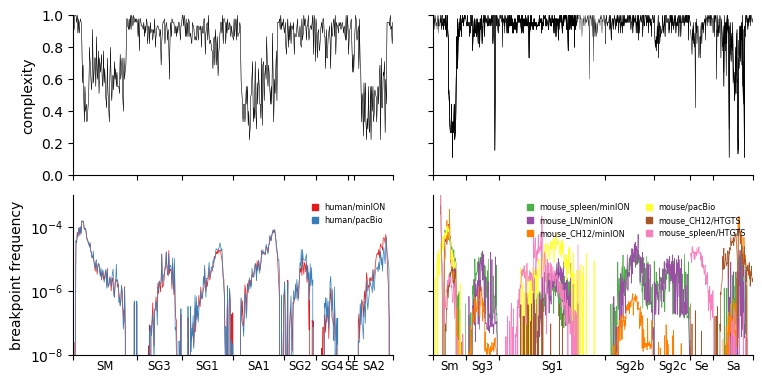

In [13]:
fig=plt.figure(figsize=(8,4))
ax=fig.add_axes([.1,.55,.4, .4])
for k in ['human/minION', 'human/pacBio']:
    pp = np.nan*np.ones(Ltot['mouse']//50)
    pp[cov_map[k][25::50]//50] = complexity[k]['complexity']
    ax.plot(pp, 'k-', label=k, linewidth=.25)
    #ax.plot(cov_map[k][25::50], complexity[k]['complexity'], 'k,', label=k, markersize=.25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([Ltot['human']//50,0])

major_ticks = []
minor_ticks = []
minor_labels = []
for rec in anno_recs['human']:
    start = shift_coord(int(rec[3][1]), cov_int['human'])
    end = shift_coord(int(rec[3][2]), cov_int['human'])
    major_ticks += [start, end]
    minor_ticks.append((start + end) / 2)
    minor_labels.append(rec[3][3])

ax.set_xticks(np.unique(major_ticks)//50)
ax.set_xticklabels([])
ax.set_xticks(np.array(minor_ticks)//50, minor=True)
#ax.set_xticklabels(minor_labels, minor=True, size="small")
ax.tick_params(which="minor", length=0)
ax.set_ylabel('complexity')
ax.set_ylim([.0, 1])

ax=fig.add_axes([.1,.1,.4, .4])
patches=[]
for n,k in enumerate(['human/minION', 'human/pacBio']):
    pp = np.nan*np.ones(Ltot['mouse']//50)
    pp[cov_map[k][::50]//50] = np.vstack(bp_hist[k]).mean(0)
    ax.plot(pp, '-', label=k, color=plt.cm.Set1(n), linewidth=.5)
    patches.append(matplotlib.patches.Patch(color=plt.cm.Set1(n), label=k))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([Ltot['human']//50,0])
ax.set_xticks(np.unique(major_ticks)//50)
ax.set_xticklabels([])
ax.set_xticks(np.array(minor_ticks)//50, minor=True)
ax.set_xticklabels(minor_labels, minor=True, size="small")
ax.tick_params(which="minor", length=0)
ax.legend(handles=patches, frameon=False, fontsize='xx-small', loc=1, handlelength=.75)
ax.set_yscale('log')
ax.set_ylim([1.e-8, .001])
ax.set_ylabel('breakpoint frequency')

ax=fig.add_axes([.55,.55,.4,.4])
for k in ['mouse_spleen/minION', 'mouse_LN/minION', 'mouse_CH12/minION', 'mouse/pacBio', 'mouse_CH12/HTGTS', 'mouse_spleen/HTGTS']:
    pp = np.nan*np.ones(Ltot['mouse']//50)
    k2=k.split('/')[0].split('_')[0] + '/' + k.split('/')[1]
    pp[cov_map[k2][::50]//50] = complexity[k2]['complexity']
    ax.plot(pp, 'k-', label=k, linewidth=.25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([Ltot['mouse']//50,0])
major_ticks = []
minor_ticks = []
minor_labels = []
for rec in anno_recs['mouse']:
    start = shift_coord(int(rec[3][1]), cov_int['mouse'])
    end = shift_coord(int(rec[3][2]), cov_int['mouse'])
    major_ticks += [start, end]
    minor_ticks.append((start + end) / 2)
    minor_labels.append(rec[3][3])
ax.set_xticks(np.unique(major_ticks)//50)
ax.set_xticklabels([])
ax.set_xticks(np.array(minor_ticks)//50, minor=True)
#ax.set_xticklabels(minor_labels, minor=True, size="small")
ax.tick_params(which="minor", length=0)
#ax.set_ylabel('complexity')
ax.set_ylim([.0, 1])
ax.set_yticklabels([])

ax=fig.add_axes([.55,.1,.4, .4])
patches=[]
for n,k in enumerate(['mouse_spleen/minION', 'mouse_LN/minION', 'mouse_CH12/minION', 'mouse/pacBio', 'mouse_CH12/HTGTS', 'mouse_spleen/HTGTS']):
    pp = np.nan*np.ones(Ltot['mouse']//50)
    k2=k.split('/')[0].split('_')[0] + '/' + k.split('/')[1]
    pp[cov_map[k2][::50]//50] = np.vstack(bp_hist[k]).mean(0)
    ax.plot(pp, '-', label=k, color=plt.cm.Set1(n+2), linewidth=.5)
    patches.append(matplotlib.patches.Patch(color=plt.cm.Set1(n+2), label=k))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([Ltot['human']//50,0])
ax.set_xticks(np.unique(major_ticks)//50)
ax.set_xticklabels([])
ax.set_xticks(np.array(minor_ticks)//50, minor=True)
ax.set_xticklabels(minor_labels, minor=True, size="small")
ax.tick_params(which="minor", length=0)
ax.set_yscale('log')
ax.set_ylim([1.e-8, .001])
ax.legend(handles=patches, frameon=False, fontsize='xx-small', loc=1, ncols=2, handlelength=.75)
#ax.set_ylabel('breakpoint frequency')
ax.set_yticklabels([])

fig.savefig('minION_vs_pacBio_vs_HTGTS_break_locations.pdf')

In [6]:
summary={'human/minION': pd.read_csv(f'output/summary/20240307_human_samples_stats.csv', index_col=0, header=0).loc[samples['human/minION']],
         'human/pacBio': pd.read_csv(f'output/summary/20240307_human_samples_stats.csv', index_col=0, header=0).loc[samples['human/pacBio']],
'mouse_spleen/minION': pd.read_csv(f'../mouse/output/summary/20240314_mouse_samples_stats.csv',header=0,index_col=0).loc[samples['mouse_spleen/minION']],
'mouse_LN/minION': pd.read_csv(f'../mouse/output/summary/20240314_mouse_samples_stats.csv',header=0,index_col=0).loc[samples['mouse_LN/minION']],
'mouse_CH12/minION': pd.read_csv(f'../mouse/output/summary/20240314_mouse_samples_stats.csv',header=0,index_col=0).loc[samples['mouse_CH12/minION']],
'mouse/pacBio': pd.read_csv(f'../external/vincendeau/output/summary/20240425_vincendeau_samples_stats.csv',header=0,index_col=0).loc[samples['mouse/pacBio']],
'mouse_CH12/HTGTS': pd.read_csv(f'../external/HTGTS/output/summary/HTGTS_stats.csv',header=0,index_col=0).loc[samples['mouse_CH12/HTGTS']],
'mouse_spleen/HTGTS': pd.read_csv(f'../external/HTGTS/output/summary/HTGTS_stats.csv',header=0,index_col=0).loc[samples['mouse_spleen/HTGTS']]}

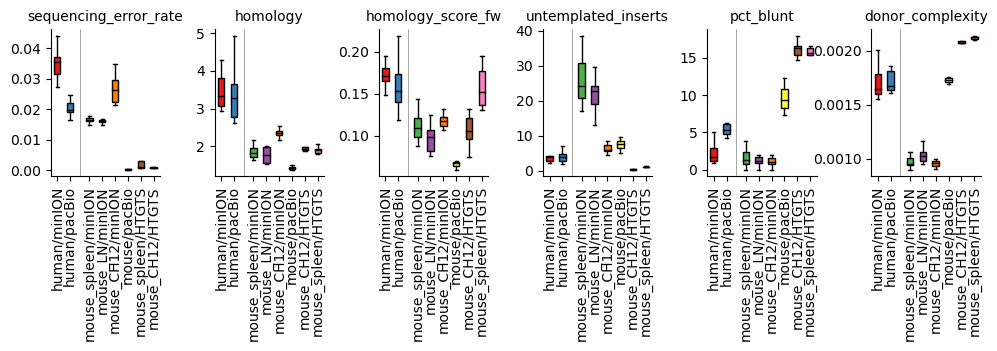

In [11]:
fig,axs = plt.subplots(1,6,figsize=(10,3.5))
fig.subplots_adjust(wspace=.5, bottom=.5, left=.05, right=.98, top=.92)

pos=[1,2,3.5,4.5,5.5,6.5,7.5,8.5]
for n, col in enumerate(['sequencing_error_rate', 'homology','homology_score_fw','untemplated_inserts','pct_blunt','donor_complexity']):
    ax = axs[n]
    trans = matplotlib.transforms.blended_transform_factory(ax.transAxes, ax.transAxes)
    vals=dict((k,v[col]) for k,v in summary.items()) if col !='sequencing_error_rate' else accuracy
    bp=ax.boxplot(vals.values(), showfliers=False, positions=pos, patch_artist=True)
    for k, patch in enumerate(bp['boxes']):
         patch.set_facecolor(plt.cm.Set1(k))
    for k, patch in enumerate(bp['medians']):
        patch.set_color('k')
    ax.set_xticks(pos)
    ax.set_xticklabels([k for k in vals.keys()], rotation=90)
    ax.axvline(2.75, color='gray', linewidth=.5)
    #ax.text(.25, 1.0, 'human', ha='center', transform=trans)
    #ax.hlines(-.1, .2, .3, color='k', linewidth=.5, transform=trans)
    #ax.text(.75, 1.0, 'mouse', ha='center', transform=trans)
    #ax.hlines(-.1, .6, .9, color='k', linewidth=.5, transform=trans)
    ax.set_title(col, size='medium')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.savefig('minION_vs_pacBio_vs_HTGTS_summary.pdf')